In [7]:
import math
from IPython.core.display import HTML, display
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def z_score(x,mu,sigma):
    return (x-mu)/sigma

In [3]:
def p_value(z_score):
    return round(norm.cdf(z_score),4)

In [4]:
def p_to_z(p_value):
    return norm.ppf(p_value)

In [5]:
def one_tail_z_table(z_score):
    """
    This is because I'm tutoring someone whose teacher gave her a Z-table with Z-Scores from 0 to 3.
    """
    p = p_value(z_score)
    if p < 0.5:
        return 0.5 - p
    else:
         return p - 0.5

# Chapter 6 will use the standard Normal Distribution curve. You will be constructing 90%, 95%, and 97% confidence intervals.

### What this means is that you will be 90%, 95%, or 97% confident in your estimate $\bar x$ of the true mean $\mu$.

### It's <u>INCREDIBLY</u> important to know that with a 90% confidence interval, you are taking off 5% from EACH side of the normal curve.

### SO when looking for your Z-score, remember to look for a P-value of 
$$\frac{1\ -\ Confidence\ Interval}{2}+Confidence\ Interval\ OR\ you\ might\ see\ Z_{\alpha/2}\ they're\ the\ same\ thing$$

### The margin of error is the latter part of the confidence interval equation: $\pm Z \frac{S}{\sqrt n}$

### You will need to find the Z-scores corresponding to those P-values.
- 90% confidence interval corresponds to a Z-Score of $\pm 1.64$
- 95% confidence interval corresponds to a Z-Score of $\pm 1.96$
- 97% confidence interval corresponds to a Z-Score of $\pm 2.17$
- 99% confidence interval corresponds to a Z-Score of $\pm 2.56$

### Go look up those P-values and Z-scores in the table below:

In [35]:
HTML("""<table border="0" align="center" cellspacing="10" cellpadding="10"  style="border: 1px solid black;">
				<tbody style="border: 1px solid black;"><tr>
					<th align="center" bgcolor="#003366"><font style="color:white; text-align:center;" class="larger">Z</font></th>
					<th >0.00</th>
					<th >0.01</th>
					<th >0.02</th>
					<th >0.03</th>
					<th style="background-color:yellow;">0.04</th>
					<th >0.05</th>
					<th style="background-color:yellow;">0.06</th>
					<th style="background-color:yellow;">0.07</th>
					<th >0.08</th>
					<th >0.09</th>
				</tr>
				<tr>
					<th >0.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.0000</td>
					<td style="text-align:center;border: 1px solid black;" >0.0040</td>
					<td style="text-align:center;border: 1px solid black;" >0.0080</td>
					<td style="text-align:center;border: 1px solid black;" >0.0120</td>
					<td style="text-align:center;border: 1px solid black;" >0.0160</td>
					<td style="text-align:center;border: 1px solid black;" >0.0199</td>
					<td style="text-align:center;border: 1px solid black;" >0.0239</td>
					<td style="text-align:center;border: 1px solid black;" >0.0279</td>
					<td style="text-align:center;border: 1px solid black;" >0.0319</td>
					<td style="text-align:center;border: 1px solid black;" >0.0359</td>
				</tr>
				<tr>
					<th >0.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.0398</td>
					<td style="text-align:center;border: 1px solid black;" >0.0438</td>
					<td style="text-align:center;border: 1px solid black;" >0.0478</td>
					<td style="text-align:center;border: 1px solid black;" >0.0517</td>
					<td style="text-align:center;border: 1px solid black;" >0.0557</td>
					<td style="text-align:center;border: 1px solid black;" >0.0596</td>
					<td style="text-align:center;border: 1px solid black;" >0.0636</td>
					<td style="text-align:center;border: 1px solid black;" >0.0675</td>
					<td style="text-align:center;border: 1px solid black;" >0.0714</td>
					<td style="text-align:center;border: 1px solid black;" >0.0753</td>
				</tr>
				<tr>
					<th >0.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.0793</td>
					<td style="text-align:center;border: 1px solid black;" >0.0832</td>
					<td style="text-align:center;border: 1px solid black;" >0.0871</td>
					<td style="text-align:center;border: 1px solid black;" >0.0910</td>
					<td style="text-align:center;border: 1px solid black;" >0.0948</td>
					<td style="text-align:center;border: 1px solid black;" >0.0987</td>
					<td style="text-align:center;border: 1px solid black;" >0.1026</td>
					<td style="text-align:center;border: 1px solid black;" >0.1064</td>
					<td style="text-align:center;border: 1px solid black;" >0.1103</td>
					<td style="text-align:center;border: 1px solid black;" >0.1141</td>
				</tr>
				<tr>
					<th >0.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.1179</td>
					<td style="text-align:center;border: 1px solid black;" >0.1217</td>
					<td style="text-align:center;border: 1px solid black;" >0.1255</td>
					<td style="text-align:center;border: 1px solid black;" >0.1293</td>
					<td style="text-align:center;border: 1px solid black;" >0.1331</td>
					<td style="text-align:center;border: 1px solid black;" >0.1368</td>
					<td style="text-align:center;border: 1px solid black;" >0.1406</td>
					<td style="text-align:center;border: 1px solid black;" >0.1443</td>
					<td style="text-align:center;border: 1px solid black;" >0.1480</td>
					<td style="text-align:center;border: 1px solid black;" >0.1517</td>
				</tr>
				<tr>
					<th >0.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.1554</td>
					<td style="text-align:center;border: 1px solid black;" >0.1591</td>
					<td style="text-align:center;border: 1px solid black;" >0.1628</td>
					<td style="text-align:center;border: 1px solid black;" >0.1664</td>
					<td style="text-align:center;border: 1px solid black;" >0.1700</td>
					<td style="text-align:center;border: 1px solid black;" >0.1736</td>
					<td style="text-align:center;border: 1px solid black;" >0.1772</td>
					<td style="text-align:center;border: 1px solid black;" >0.1808</td>
					<td style="text-align:center;border: 1px solid black;" >0.1844</td>
					<td style="text-align:center;border: 1px solid black;" >0.1879</td>
				</tr>
				<tr>
					<th >0.5</th>
					<td style="text-align:center;border: 1px solid black;" >0.1915</td>
					<td style="text-align:center;border: 1px solid black;" >0.1950</td>
					<td style="text-align:center;border: 1px solid black;" >0.1985</td>
					<td style="text-align:center;border: 1px solid black;" >0.2019</td>
					<td style="text-align:center;border: 1px solid black;" >0.2054</td>
					<td style="text-align:center;border: 1px solid black;">0.2088</td>
					<td style="text-align:center;border: 1px solid black;" >0.2123</td>
					<td style="text-align:center;border: 1px solid black;" >0.2157</td>
					<td style="text-align:center;border: 1px solid black;" >0.2190</td>
					<td style="text-align:center;border: 1px solid black;" >0.2224</td>
				</tr>
				<tr>
					<th >0.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.2257</td>
					<td style="text-align:center;border: 1px solid black;" >0.2291</td>
					<td style="text-align:center;border: 1px solid black;" >0.2324</td>
					<td style="text-align:center;border: 1px solid black;" >0.2357</td>
					<td style="text-align:center;border: 1px solid black;" >0.2389</td>
					<td style="text-align:center;border: 1px solid black;" >0.2422</td>
					<td style="text-align:center;border: 1px solid black;" >0.2454</td>
					<td style="text-align:center;border: 1px solid black;" >0.2486</td>
					<td style="text-align:center;border: 1px solid black;" >0.2517</td>
					<td style="text-align:center;border: 1px solid black;" >0.2549</td>
				</tr>
				<tr>
					<th >0.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.2580</td>
					<td style="text-align:center;border: 1px solid black;" >0.2611</td>
					<td style="text-align:center;border: 1px solid black;" >0.2642</td>
					<td style="text-align:center;border: 1px solid black;" >0.2673</td>
					<td style="text-align:center;border: 1px solid black;" >0.2704</td>
					<td style="text-align:center;border: 1px solid black;" >0.2734</td>
					<td style="text-align:center;border: 1px solid black;" >0.2764</td>
					<td style="text-align:center;border: 1px solid black;" >0.2794</td>
					<td style="text-align:center;border: 1px solid black;" >0.2823</td>
					<td style="text-align:center;border: 1px solid black;" >0.2852</td>
				</tr>
				<tr>
					<th >0.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.2881</td>
					<td style="text-align:center;border: 1px solid black;" >0.2910</td>
					<td style="text-align:center;border: 1px solid black;" >0.2939</td>
					<td style="text-align:center;border: 1px solid black;" >0.2967</td>
					<td style="text-align:center;border: 1px solid black;" >0.2995</td>
					<td style="text-align:center;border: 1px solid black;" >0.3023</td>
					<td style="text-align:center;border: 1px solid black;" >0.3051</td>
					<td style="text-align:center;border: 1px solid black;" >0.3078</td>
					<td style="text-align:center;border: 1px solid black;" >0.3106</td>
					<td style="text-align:center;border: 1px solid black;" >0.3133</td>
				</tr>
				<tr>
					<th >0.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.3159</td>
					<td style="text-align:center;border: 1px solid black;" >0.3186</td>
					<td style="text-align:center;border: 1px solid black;" >0.3212</td>
					<td style="text-align:center;border: 1px solid black;" >0.3238</td>
					<td style="text-align:center;border: 1px solid black;" >0.3264</td>
					<td style="text-align:center;border: 1px solid black;" >0.3289</td>
					<td style="text-align:center;border: 1px solid black;" >0.3315</td>
					<td style="text-align:center;border: 1px solid black;" >0.3340</td>
					<td style="text-align:center;border: 1px solid black;" >0.3365</td>
					<td style="text-align:center;border: 1px solid black;" >0.3389</td>
				</tr>
				<tr>
					<th >1.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.3413</td>
					<td style="text-align:center;border: 1px solid black;" >0.3438</td>
					<td style="text-align:center;border: 1px solid black;" >0.3461</td>
					<td style="text-align:center;border: 1px solid black;" >0.3485</td>
					<td style="text-align:center;border: 1px solid black;" >0.3508</td>
					<td style="text-align:center;border: 1px solid black;" >0.3531</td>
					<td style="text-align:center;border: 1px solid black;" >0.3554</td>
					<td style="text-align:center;border: 1px solid black;" >0.3577</td>
					<td style="text-align:center;border: 1px solid black;" >0.3599</td>
					<td style="text-align:center;border: 1px solid black;" >0.3621</td>
				</tr>
				<tr>
					<th >1.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.3643</td>
					<td style="text-align:center;border: 1px solid black;" >0.3665</td>
					<td style="text-align:center;border: 1px solid black;" >0.3686</td>
					<td style="text-align:center;border: 1px solid black;" >0.3708</td>
					<td style="text-align:center;border: 1px solid black;" >0.3729</td>
					<td style="text-align:center;border: 1px solid black;" >0.3749</td>
					<td style="text-align:center;border: 1px solid black;" >0.3770</td>
					<td style="text-align:center;border: 1px solid black;" >0.3790</td>
					<td style="text-align:center;border: 1px solid black;" >0.3810</td>
					<td style="text-align:center;border: 1px solid black;" >0.3830</td>
				</tr>
				<tr>
					<th >1.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.3849</td>
					<td style="text-align:center;border: 1px solid black;" >0.3869</td>
					<td style="text-align:center;border: 1px solid black;" >0.3888</td>
					<td style="text-align:center;border: 1px solid black;" >0.3907</td>
					<td style="text-align:center;border: 1px solid black;" >0.3925</td>
					<td style="text-align:center;border: 1px solid black;" >0.3944</td>
					<td style="text-align:center;border: 1px solid black;" >0.3962</td>
					<td style="text-align:center;border: 1px solid black;" >0.3980</td>
					<td style="text-align:center;border: 1px solid black;" >0.3997</td>
					<td style="text-align:center;border: 1px solid black;" >0.4015</td>
				</tr>
				<tr>
					<th >1.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.4032</td>
					<td style="text-align:center;border: 1px solid black;" >0.4049</td>
					<td style="text-align:center;border: 1px solid black;" >0.4066</td>
					<td style="text-align:center;border: 1px solid black;" >0.4082</td>
					<td style="text-align:center;border: 1px solid black;" >0.4099</td>
					<td style="text-align:center;border: 1px solid black;" >0.4115</td>
					<td style="text-align:center;border: 1px solid black;" >0.4131</td>
					<td style="text-align:center;border: 1px solid black;" >0.4147</td>
					<td style="text-align:center;border: 1px solid black;" >0.4162</td>
					<td style="text-align:center;border: 1px solid black;" >0.4177</td>
				</tr>
				<tr>
					<th >1.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.4192</td>
					<td style="text-align:center;border: 1px solid black;" >0.4207</td>
					<td style="text-align:center;border: 1px solid black;" >0.4222</td>
					<td style="text-align:center;border: 1px solid black;" >0.4236</td>
					<td style="text-align:center;border: 1px solid black;" >0.4251</td>
					<td style="text-align:center;border: 1px solid black;" >0.4265</td>
					<td style="text-align:center;border: 1px solid black;" >0.4279</td>
					<td style="text-align:center;border: 1px solid black;" >0.4292</td>
					<td style="text-align:center;border: 1px solid black;" >0.4306</td>
					<td style="text-align:center;border: 1px solid black;" >0.4319</td>
				</tr>
				<tr>
					<th >1.5</th>
					<td style="text-align:center;border: 1px solid black;">0.4332</td>
					<td style="text-align:center;border: 1px solid black;" >0.4345</td>
					<td style="text-align:center;border: 1px solid black;" >0.4357</td>
					<td style="text-align:center;border: 1px solid black;" >0.4370</td>
					<td style="text-align:center;border: 1px solid black;" >0.4382</td>
					<td style="text-align:center;border: 1px solid black;" >0.4394</td>
					<td style="text-align:center;border: 1px solid black;" >0.4406</td>
					<td style="text-align:center;border: 1px solid black;" >0.4418</td>
					<td style="text-align:center;border: 1px solid black;" >0.4429</td>
					<td style="text-align:center;border: 1px solid black;" >0.4441</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">1.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.4452</td>
					<td style="text-align:center;border: 1px solid black;" >0.4463</td>
					<td style="text-align:center;border: 1px solid black;" >0.4474</td>
					<td style="text-align:center;border: 1px solid black;" >0.4484</td>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;" >0.4495</td>
					<td style="text-align:center;border: 1px solid black;" >0.4505</td>
					<td style="text-align:center;border: 1px solid black;" >0.4515</td>
					<td style="text-align:center;border: 1px solid black;" >0.4525</td>
					<td style="text-align:center;border: 1px solid black;" >0.4535</td>
					<td style="text-align:center;border: 1px solid black;" >0.4545</td>
				</tr>
				<tr>
					<th >1.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.4554</td>
					<td style="text-align:center;border: 1px solid black;" >0.4564</td>
					<td style="text-align:center;border: 1px solid black;" >0.4573</td>
					<td style="text-align:center;border: 1px solid black;" >0.4582</td>
					<td style="text-align:center;border: 1px solid black;" >0.4591</td>
					<td style="text-align:center;border: 1px solid black;" >0.4599</td>
					<td style="text-align:center;border: 1px solid black;" >0.4608</td>
					<td style="text-align:center;border: 1px solid black;" >0.4616</td>
					<td style="text-align:center;border: 1px solid black;" >0.4625</td>
					<td style="text-align:center;border: 1px solid black;" >0.4633</td>
				</tr>
				<tr>
					<th >1.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.4641</td>
					<td style="text-align:center;border: 1px solid black;" >0.4649</td>
					<td style="text-align:center;border: 1px solid black;" >0.4656</td>
					<td style="text-align:center;border: 1px solid black;" >0.4664</td>
					<td style="text-align:center;border: 1px solid black;" >0.4671</td>
					<td style="text-align:center;border: 1px solid black;" >0.4678</td>
					<td style="text-align:center;border: 1px solid black;" >0.4686</td>
					<td style="text-align:center;border: 1px solid black;" >0.4693</td>
					<td style="text-align:center;border: 1px solid black;" >0.4699</td>
					<td style="text-align:center;border: 1px solid black;" >0.4706</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">1.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.4713</td>
					<td style="text-align:center;border: 1px solid black;" >0.4719</td>
					<td style="text-align:center;border: 1px solid black;" >0.4726</td>
					<td style="text-align:center;border: 1px solid black;" >0.4732</td>
					<td style="text-align:center;border: 1px solid black;" >0.4738</td>
					<td style="text-align:center;border: 1px solid black;" >0.4744</td>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;" >0.4750</td>
					<td style="text-align:center;border: 1px solid black;" >0.4756</td>
					<td style="text-align:center;border: 1px solid black;" >0.4761</td>
					<td style="text-align:center;border: 1px solid black;" >0.4767</td>
				</tr>
				<tr>
					<th >2.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.4772</td>
					<td style="text-align:center;border: 1px solid black;" >0.4778</td>
					<td style="text-align:center;border: 1px solid black;" >0.4783</td>
					<td style="text-align:center;border: 1px solid black;" >0.4788</td>
					<td style="text-align:center;border: 1px solid black;" >0.4793</td>
					<td style="text-align:center;border: 1px solid black;" >0.4798</td>
					<td style="text-align:center;border: 1px solid black;" >0.4803</td>
					<td style="text-align:center;border: 1px solid black;" >0.4808</td>
					<td style="text-align:center;border: 1px solid black;" >0.4812</td>
					<td style="text-align:center;border: 1px solid black;" >0.4817</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">2.1</th>
					<td style="text-align:center;border: 1px solid black;" >0.4821</td>
					<td style="text-align:center;border: 1px solid black;" >0.4826</td>
					<td style="text-align:center;border: 1px solid black;" >0.4830</td>
					<td style="text-align:center;border: 1px solid black;" >0.4834</td>
					<td style="text-align:center;border: 1px solid black;" >0.4838</td>
					<td style="text-align:center;border: 1px solid black;" >0.4842</td>
					<td style="text-align:center;border: 1px solid black;" >0.4846</td>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;" >0.4850</td>
					<td style="text-align:center;border: 1px solid black;" >0.4854</td>
					<td style="text-align:center;border: 1px solid black;" >0.4857</td>
				</tr>
				<tr>
					<th >2.2</th>
					<td style="text-align:center;border: 1px solid black;" >0.4861</td>
					<td style="text-align:center;border: 1px solid black;" >0.4864</td>
					<td style="text-align:center;border: 1px solid black;" >0.4868</td>
					<td style="text-align:center;border: 1px solid black;" >0.4871</td>
					<td style="text-align:center;border: 1px solid black;" >0.4875</td>
					<td style="text-align:center;border: 1px solid black;" >0.4878</td>
					<td style="text-align:center;border: 1px solid black;" >0.4881</td>
					<td style="text-align:center;border: 1px solid black;" >0.4884</td>
					<td style="text-align:center;border: 1px solid black;" >0.4887</td>
					<td style="text-align:center;border: 1px solid black;" >0.4890</td>
				</tr>
				<tr>
					<th >2.3</th>
					<td style="text-align:center;border: 1px solid black;" >0.4893</td>
					<td style="text-align:center;border: 1px solid black;" >0.4896</td>
					<td style="text-align:center;border: 1px solid black;" >0.4898</td>
					<td style="text-align:center;border: 1px solid black;">0.4901</td>
					<td style="text-align:center;border: 1px solid black;" >0.4904</td>
					<td style="text-align:center;border: 1px solid black;" >0.4906</td>
					<td style="text-align:center;border: 1px solid black;" >0.4909</td>
					<td style="text-align:center;border: 1px solid black;" >0.4911</td>
					<td style="text-align:center;border: 1px solid black;" >0.4913</td>
					<td style="text-align:center;border: 1px solid black;" >0.4916</td>
				</tr>
				<tr>
					<th >2.4</th>
					<td style="text-align:center;border: 1px solid black;" >0.4918</td>
					<td style="text-align:center;border: 1px solid black;" >0.4920</td>
					<td style="text-align:center;border: 1px solid black;" >0.4922</td>
					<td style="text-align:center;border: 1px solid black;" >0.4925</td>
					<td style="text-align:center;border: 1px solid black;" >0.4927</td>
					<td style="text-align:center;border: 1px solid black;" >0.4929</td>
					<td style="text-align:center;border: 1px solid black;" >0.4931</td>
					<td style="text-align:center;border: 1px solid black;" >0.4932</td>
					<td style="text-align:center;border: 1px solid black;" >0.4934</td>
					<td style="text-align:center;border: 1px solid black;" >0.4936</td>
				</tr>
				<tr>
					<th style="background-color:yellow;">2.5</th>
					<td style="text-align:center;border: 1px solid black;" >0.4938</td>
					<td style="text-align:center;border: 1px solid black;" >0.4940</td>
					<td style="text-align:center;border: 1px solid black;" >0.4941</td>
					<td style="text-align:center;border: 1px solid black;" >0.4943</td>
					<td style="text-align:center;border: 1px solid black;" >0.4945</td>
					<td style="text-align:center;border: 1px solid black;" >0.4946</td>
					<td style="text-align:center;border: 1px solid black;" >0.4948</td>
					<td style="text-align:center;border: 1px solid black;background-color:tomato;" >0.4949</td>
					<td style="text-align:center;border: 1px solid black;" >0.4951</td>
					<td style="text-align:center;border: 1px solid black;" >0.4952</td>
				</tr>
				<tr>
					<th >2.6</th>
					<td style="text-align:center;border: 1px solid black;" >0.4953</td>
					<td style="text-align:center;border: 1px solid black;" >0.4955</td>
					<td style="text-align:center;border: 1px solid black;" >0.4956</td>
					<td style="text-align:center;border: 1px solid black;" >0.4957</td>
					<td style="text-align:center;border: 1px solid black;" >0.4959</td>
					<td style="text-align:center;border: 1px solid black;" >0.4960</td>
					<td style="text-align:center;border: 1px solid black;" >0.4961</td>
					<td style="text-align:center;border: 1px solid black;" >0.4962</td>
					<td style="text-align:center;border: 1px solid black;" >0.4963</td>
					<td style="text-align:center;border: 1px solid black;" >0.4964</td>
				</tr>
				<tr>
					<th >2.7</th>
					<td style="text-align:center;border: 1px solid black;" >0.4965</td>
					<td style="text-align:center;border: 1px solid black;" >0.4966</td>
					<td style="text-align:center;border: 1px solid black;" >0.4967</td>
					<td style="text-align:center;border: 1px solid black;" >0.4968</td>
					<td style="text-align:center;border: 1px solid black;" >0.4969</td>
					<td style="text-align:center;border: 1px solid black;" >0.4970</td>
					<td style="text-align:center;border: 1px solid black;" >0.4971</td>
					<td style="text-align:center;border: 1px solid black;" >0.4972</td>
					<td style="text-align:center;border: 1px solid black;" >0.4973</td>
					<td style="text-align:center;border: 1px solid black;" >0.4974</td>
				</tr>
				<tr>
					<th >2.8</th>
					<td style="text-align:center;border: 1px solid black;" >0.4974</td>
					<td style="text-align:center;border: 1px solid black;" >0.4975</td>
					<td style="text-align:center;border: 1px solid black;" >0.4976</td>
					<td style="text-align:center;border: 1px solid black;" >0.4977</td>
					<td style="text-align:center;border: 1px solid black;" >0.4977</td>
					<td style="text-align:center;border: 1px solid black;" >0.4978</td>
					<td style="text-align:center;border: 1px solid black;" >0.4979</td>
					<td style="text-align:center;border: 1px solid black;" >0.4979</td>
					<td style="text-align:center;border: 1px solid black;" >0.4980</td>
					<td style="text-align:center;border: 1px solid black;" >0.4981</td>
				</tr>
				<tr>
					<th >2.9</th>
					<td style="text-align:center;border: 1px solid black;" >0.4981</td>
					<td style="text-align:center;border: 1px solid black;" >0.4982</td>
					<td style="text-align:center;border: 1px solid black;" >0.4982</td>
					<td style="text-align:center;border: 1px solid black;" >0.4983</td>
					<td style="text-align:center;border: 1px solid black;" >0.4984</td>
					<td style="text-align:center;border: 1px solid black;" >0.4984</td>
					<td style="text-align:center;border: 1px solid black;" >0.4985</td>
					<td style="text-align:center;border: 1px solid black;" >0.4985</td>
					<td style="text-align:center;border: 1px solid black;" >0.4986</td>
					<td style="text-align:center;border: 1px solid black;" >0.4986</td>
				</tr>
				<tr>
					<th >3.0</th>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4987</td>
					<td style="text-align:center;border: 1px solid black;" >0.4988</td>
					<td style="text-align:center;border: 1px solid black;" >0.4988</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4989</td>
					<td style="text-align:center;border: 1px solid black;" >0.4990</td>
					<td style="text-align:center;border: 1px solid black;" >0.4990</td>
				</tr>
			</tbody></table>""")

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.0000,0.0040,0.0080,0.0120,0.0160,0.0199,0.0239,0.0279,0.0319,0.0359
0.1,0.0398,0.0438,0.0478,0.0517,0.0557,0.0596,0.0636,0.0675,0.0714,0.0753
0.2,0.0793,0.0832,0.0871,0.0910,0.0948,0.0987,0.1026,0.1064,0.1103,0.1141
0.3,0.1179,0.1217,0.1255,0.1293,0.1331,0.1368,0.1406,0.1443,0.1480,0.1517
0.4,0.1554,0.1591,0.1628,0.1664,0.1700,0.1736,0.1772,0.1808,0.1844,0.1879
0.5,0.1915,0.1950,0.1985,0.2019,0.2054,0.2088,0.2123,0.2157,0.2190,0.2224
0.6,0.2257,0.2291,0.2324,0.2357,0.2389,0.2422,0.2454,0.2486,0.2517,0.2549
0.7,0.2580,0.2611,0.2642,0.2673,0.2704,0.2734,0.2764,0.2794,0.2823,0.2852
0.8,0.2881,0.2910,0.2939,0.2967,0.2995,0.3023,0.3051,0.3078,0.3106,0.3133
0.9,0.3159,0.3186,0.3212,0.3238,0.3264,0.3289,0.3315,0.3340,0.3365,0.3389


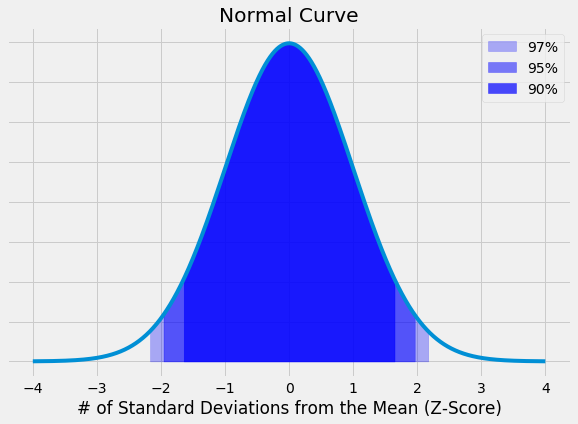

In [36]:
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')

x_1 = np.arange(-4, 4, .001)
# x_2 = np.arange(120, mu + sigma * 4, 1)

y_1 = norm.pdf(x_1, 0, 1)
# y_2 = norm.pdf(x_2, mu, sigma)

# x_all = np.arange(mu - sigma * 4 ,
#                   mu + sigma * 4,
#                   1)
# y_all = norm.pdf(x_all, mu, sigma)

ax.plot(x_1,y_1)
a = ax.fill_between(np.arange(-norm.ppf(.985),norm.ppf(.985),0.0001),norm.pdf(np.arange(-norm.ppf(.985),norm.ppf(.985),0.0001),0,1),0,color='b',alpha=0.3)
b = ax.fill_between(np.arange(-norm.ppf(.975),norm.ppf(.975),0.0001),norm.pdf(np.arange(-norm.ppf(.975),norm.ppf(.975),0.0001),0,1),0,color='b',alpha=0.5)
c = ax.fill_between(np.arange(-norm.ppf(.95),norm.ppf(.95),0.0001),norm.pdf(np.arange(-norm.ppf(.95),norm.ppf(.95),0.0001),0,1),0,color='b',alpha=0.7)
# ax.annotate("I will explain how to find\nthe P-values for these below.",[-4,0.35])

ax.set_xlabel('# of Standard Deviations from the Mean (Z-Score)')
ax.legend(handles=[a,b,c], labels=["97%","95%","90%"])
ax.set_yticklabels([])
ax.set_title('Normal Curve')
plt.show()

### Step 1: Find your variables.
- The mean $\bar{x}$
- The standard deviation $s$
- And the number of observations $n$

### Step 2: Using the given confidence level, find your Z-scores.
- These were given and explained above.

### Step 3: Construct your confidence interval using the following equation.
$$\bar{X}\pm Z \frac{S}{\sqrt n}$$

## Problem 6.
A sample consists of 75 food processors purchased several years ago. The replacement times of those processors have a mean of 8.2 years and standard deviation of 1.1 years. COnstruct a 90% confidence interval for the mean replacement time of all the food processors from that time.
- The mean $\bar{x}\ =\ 8.2\ years$
- The standard deviation $s\ =\ 1.1\ years$
- And the number of observations $n\ =\ 75\ food\ processors$

#### Confidence level: 90%
#### Z-scores: $\pm1.64$
### Confidence Interval: $$8.2\ \pm\ 1.64\frac{1.1}{\sqrt 75}\ =\ [8.0 < \mu < 8.4]$$

### We are 90% confident that the true population mean $\mu$ of food processor replacement times is between 8.0 years and 8.4 years.

## Problem 7.
A psychologist developed a new test of spatial perception and she wants to estimate the mean score achieved by male pilots. How many people must she test if she wants the sample mean to be in error by no more than 2.0 points with 95% confidence?

#### When determining how large a sample size you need, always round up. You cannot have 0.5 of a person and you don't want an error larger than the desired amount.
- The mean $\bar{x}\ not\ needed$
- The standard deviation $s\ =\ unknown$
- And the number of observations $n\ =\ unknown$

#### Confidence level: 95%
#### Z-scores: $\pm1.96$
### Error: 
$$Desired\ Error\le2.0$$
$$1.96\frac{S}{\sqrt n}\le2.0$$
$$n\le (1.96\frac{S}{2})^2$$

### The answer key says $n\ =\ 432$ but there is no $s$ in the question to find $n$.

# Proportions
## These are very different than the other confidence intervals.
## The idea is that you will use probabilities and known equations to construct confidence intervals.
$$sample\ proportion\ \hat{p}\pm Z \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}$$
### $p$ is the true mean proportion
### $\hat{p}$ is the sample proportion (true cases)
### $(1-\hat{p})$ are the (false cases)

## Problem 8.
It was found that out of 800 people tested, 600 had normal blood pressure. Using 95% confidence, construct the interval estimate of the sample population proportion of people with normal blood pressure.

- Sample size $n$ = 800
- Normal blood pressure $\hat{p}=\frac{600}{800}=\frac{3}{4}=0.75$
- Not normal blood pressure $(1-\hat{p})=\frac{200}{800}=\frac{1}{4}=0.25$

### Confidence level: 95%
### Z-score: 1.96

$$0.75\pm1.96\sqrt{\frac{0.75*0.25}{800}}=\pm0.03\ meaning\ [0.720<p<0.780]$$

## We are 95% confident that the true proportion of people with normal blood pressure is between 72% and 78%.

## Problem 9.
Find minimum sample size required to estimate a population proportion with a margin of error of 2% and a confidence level of 97%; sample proportion from the previous study is estimated to be 0.85.

- Sample size $n$ = unknown
- True Cases $\hat{p}=0.85$
- False Cases $(1-\hat{p})=0.15$

### Confidence level: 97%
### Z-score: 2.17

$$Error=2.17\sqrt{\frac{0.85*0.15}{n}}=0.02$$
Multiply 0.85 and 0.15
$$2.17\sqrt{\frac{0.1275}{n}}=0.02$$
Divide both sides by the Z-score
$$\sqrt{\frac{0.1275}{n}}=\frac{0.02}{2.17}$$
Square both sides
$$\frac{0.1275}{n}={(\frac{0.02}{2.17})}^2$$
Invert both sides by raising to the power of -1
$${(\frac{0.1275}{n})}^{-1}={(\frac{0.02}{2.17})}^{-2}=\frac{n}{0.1275}={(\frac{2.17}{0.02})}^{2}$$
Multiply both sides by $\hat{p}(1-\hat{p})$
$$n={(\frac{2.17}{0.02})}^{2}*0.1275=1501\ people$$

## The minimum sample size required to estimate a population proportion with a margin of error of 2% and a 97% confidence level is 1501.